#### Eksik Gözlem

- İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir. bir veri yerine NA değeri gibi

- Eksik değere sahip gözlemlerin veri setinden direk çıkarılması ve rassalığının incelenmemesi yapılacak istatiksel çıkarımların , modelleme çalışmalarının güvenilirliğini düşürecektir.

---

1. Veri Setindeki Eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir

Müşteriler Kredi kartı harcaması değişkeni var ve bazı müşterilerin harcaması NA gözüküyor. Fakat bu problemler nerede oluştu. Yapısal bir problem şöyle örnek verilebilir bir sütun daha düşünelim müşterinin kredi kartı var mı diye ve eğer kartı yoksa bir karta sahip değilse harcamasıda olamayacağından NA değeri girilmiş olabnlir. Bu durumda NA verinin yani kredi kartı harcama sütununda NA yerlerine ortalama atandığını düşünürsek bu çok büyük bir hata olacaktır.

---

2. Na her zaman eksiklik anlamına gelmez.

---

3. Bilgi kaybı (Eksik veri silmek) 

---

---

---

#### Eksik Veri Türleri 

- Tümüyle Raslantısal Kayıp: Diğer değişkenlerden ya da yapısal problemlerden kaynaklanmayan tamamen rastgele oluşan gözlemler.

- Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.

- Rastlantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

---

Eksik veriyi Silmek veya ortalama ile doldurabilmek için Rassallığın test edilmesi gerekiyor dedik Eksik Veri Rassalığı Testi aşağıdakiler ile yapılabilir : 

- Görsel Teknikler

- Bağımsız İki Örneklem T Testi

- Korelasyon Testi

- Little'nin MCAR testi

Görsel teknikler ve Little'nin MCAR testi ile yapılıyor.(genellikle)

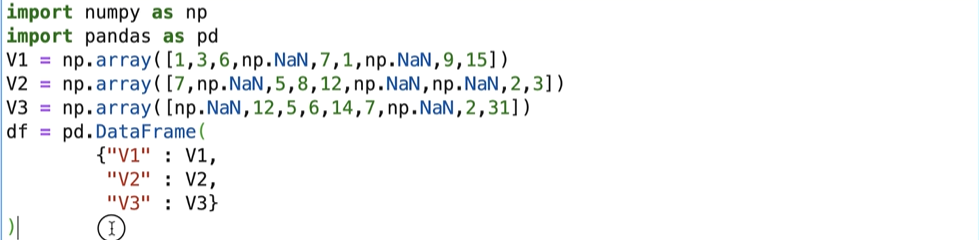

In [17]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.nan,7,1,np.nan,9,15])
V2 = np.array([7,np.nan,5,8,12,np.nan,np.nan,2,3])
V3 = np.array([np.nan,12,5,6,14,7,np.nan,2,31])

df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


In [3]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [4]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [5]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [6]:
df.notnull().sum().sum()

np.int64(20)

In [ ]:
df[df.isnull().any(axis=1)]

## axis parametresi hangi yönde işlem yapılacağını belirtir:

## axis=0 → satırlar üzerinde işlem yapar (dikey)

## axis=1 → sütunlar üzerinde işlem yapar (yatay)

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [11]:
df[df['V1'].notnull()]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [12]:
df[df['V1'].notnull() & df['V2'].notnull() & df['V3'].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
##eksik değerlerin silinmesi 
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [18]:
df['V1'].fillna(df['V1'].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [19]:
df['V2'].fillna(df['V2'].mean())

0     7.000000
1     6.166667
2     5.000000
3     8.000000
4    12.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: V2, dtype: float64

In [20]:
df['V3'].fillna(df['V3'].mean())

0    11.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6    11.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [23]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


---

##### Eksik Veri Yapısının Görselleştirilmesi


<Axes: >

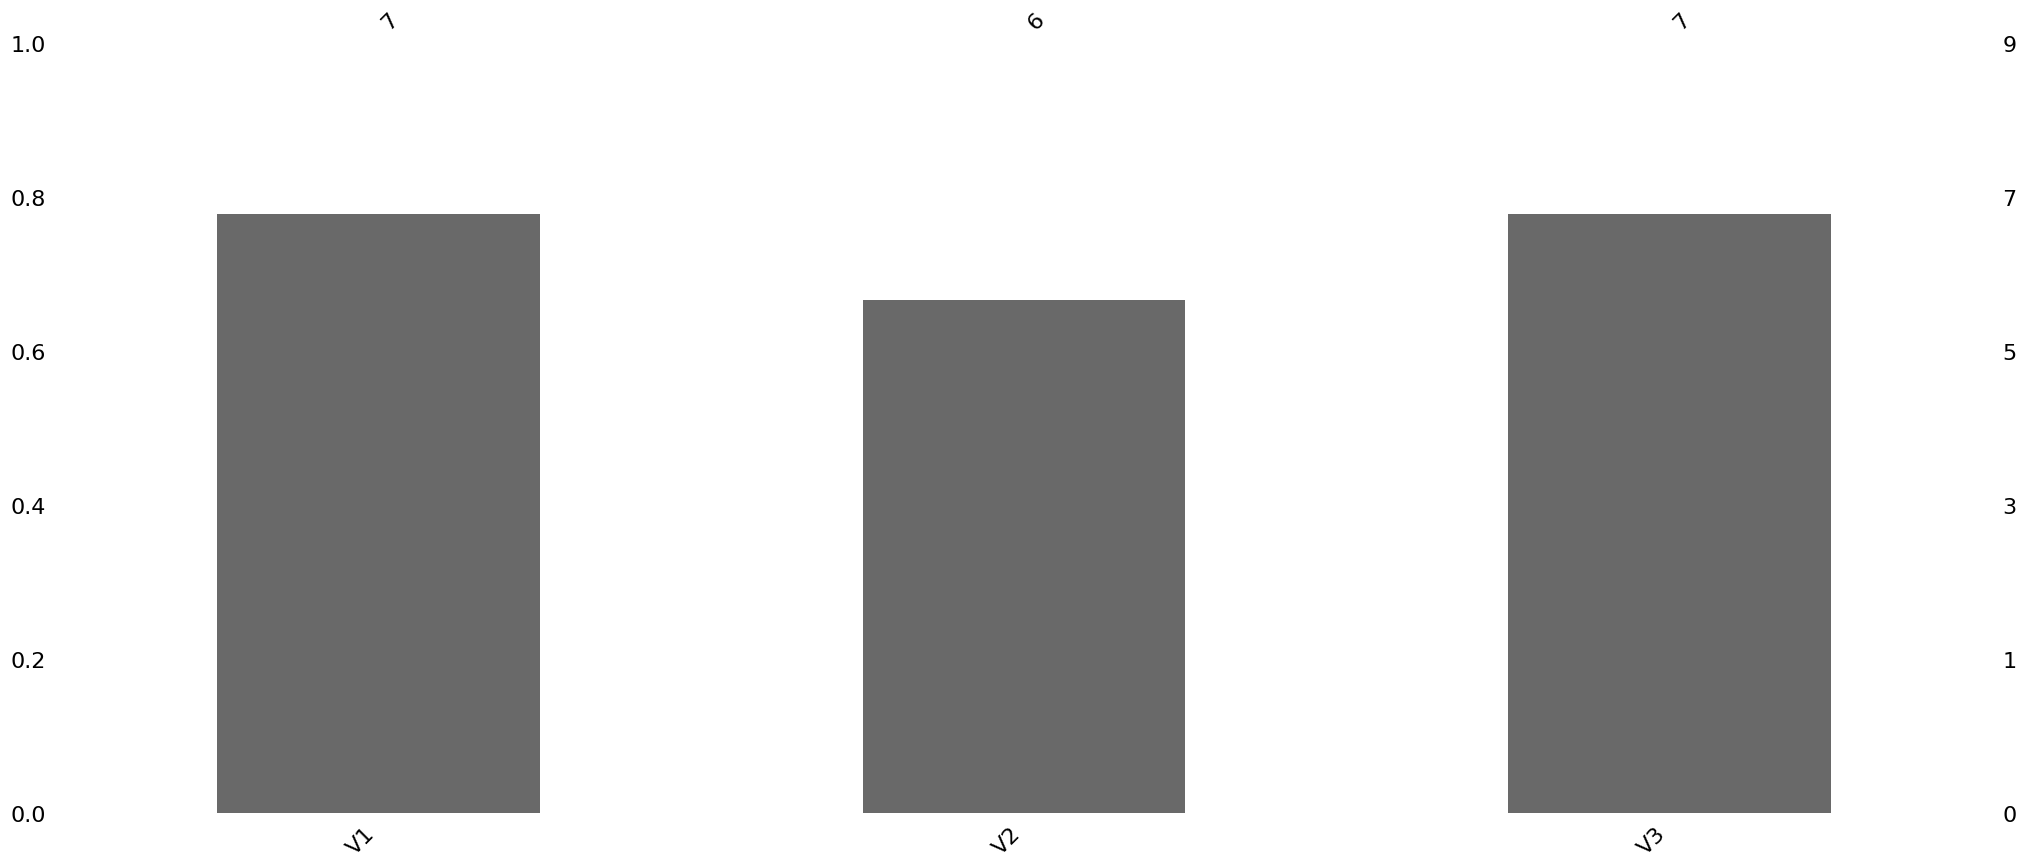

In [ ]:
import missingno as msno
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.nan,7,1,np.nan,9,15])
V2 = np.array([7,np.nan,5,8,12,np.nan,np.nan,2,3])
V3 = np.array([np.nan,12,5,6,14,7,np.nan,2,31])

df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
msno.bar(df) # V1: 7 tam gözlem ,V2: 6 tane tam gözlem ,V3: 7 tane tam gözlem

<Axes: >

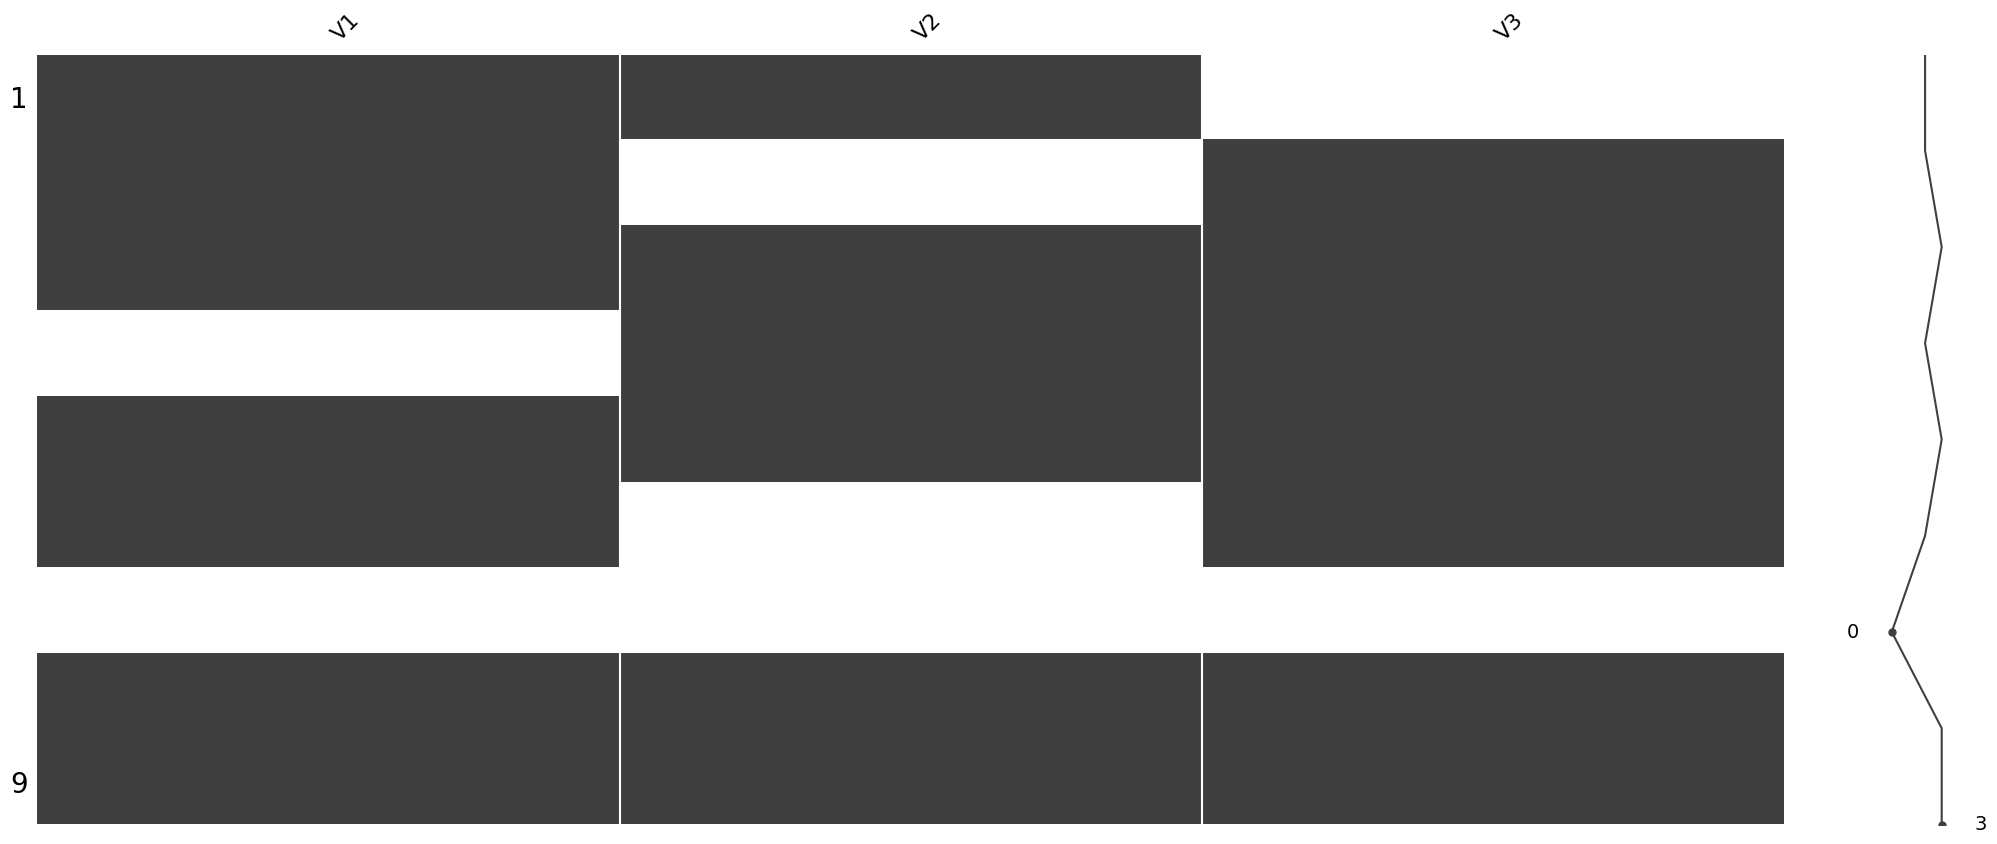

In [ ]:
msno.matrix(df) ## satırlardaki boşlukları veriyor her bir sütunda

In [9]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [11]:
import seaborn as sns 
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [13]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<Axes: >

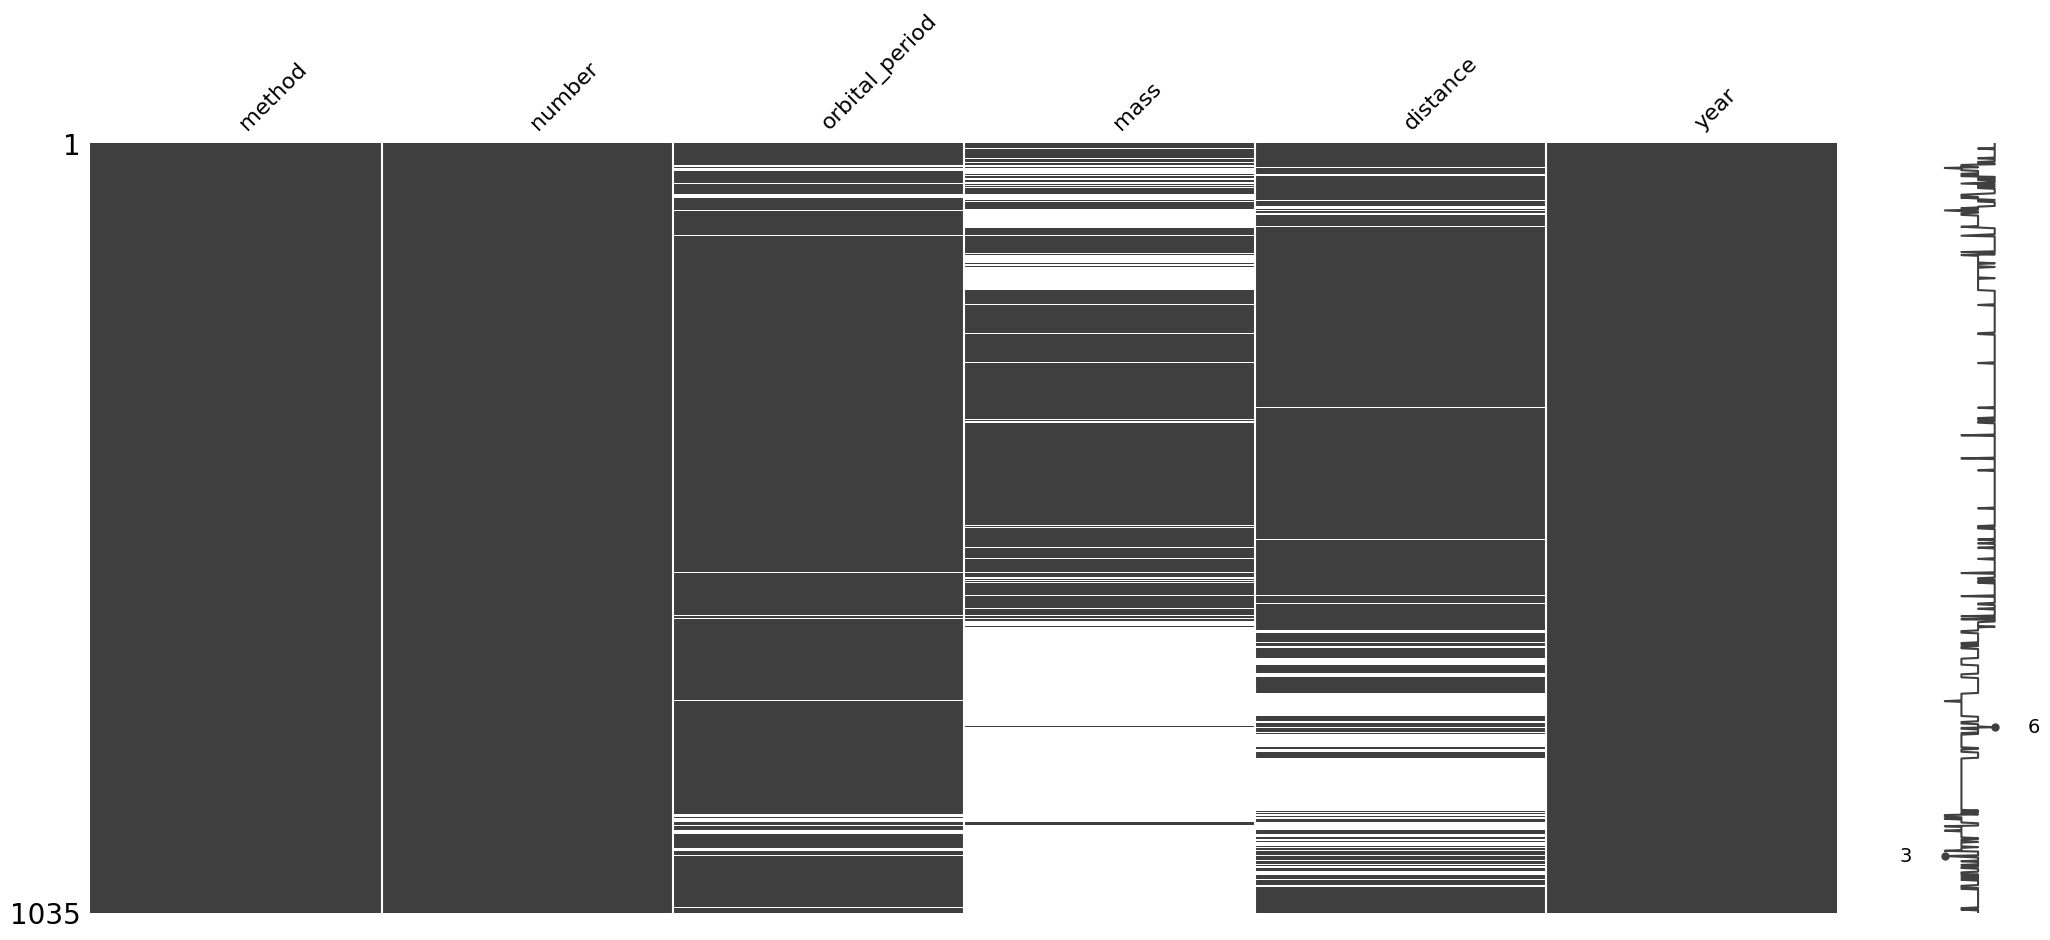

In [ ]:
msno.matrix(df) # orbital period eksikken massde boş yani birbirine bağlı

<Axes: >

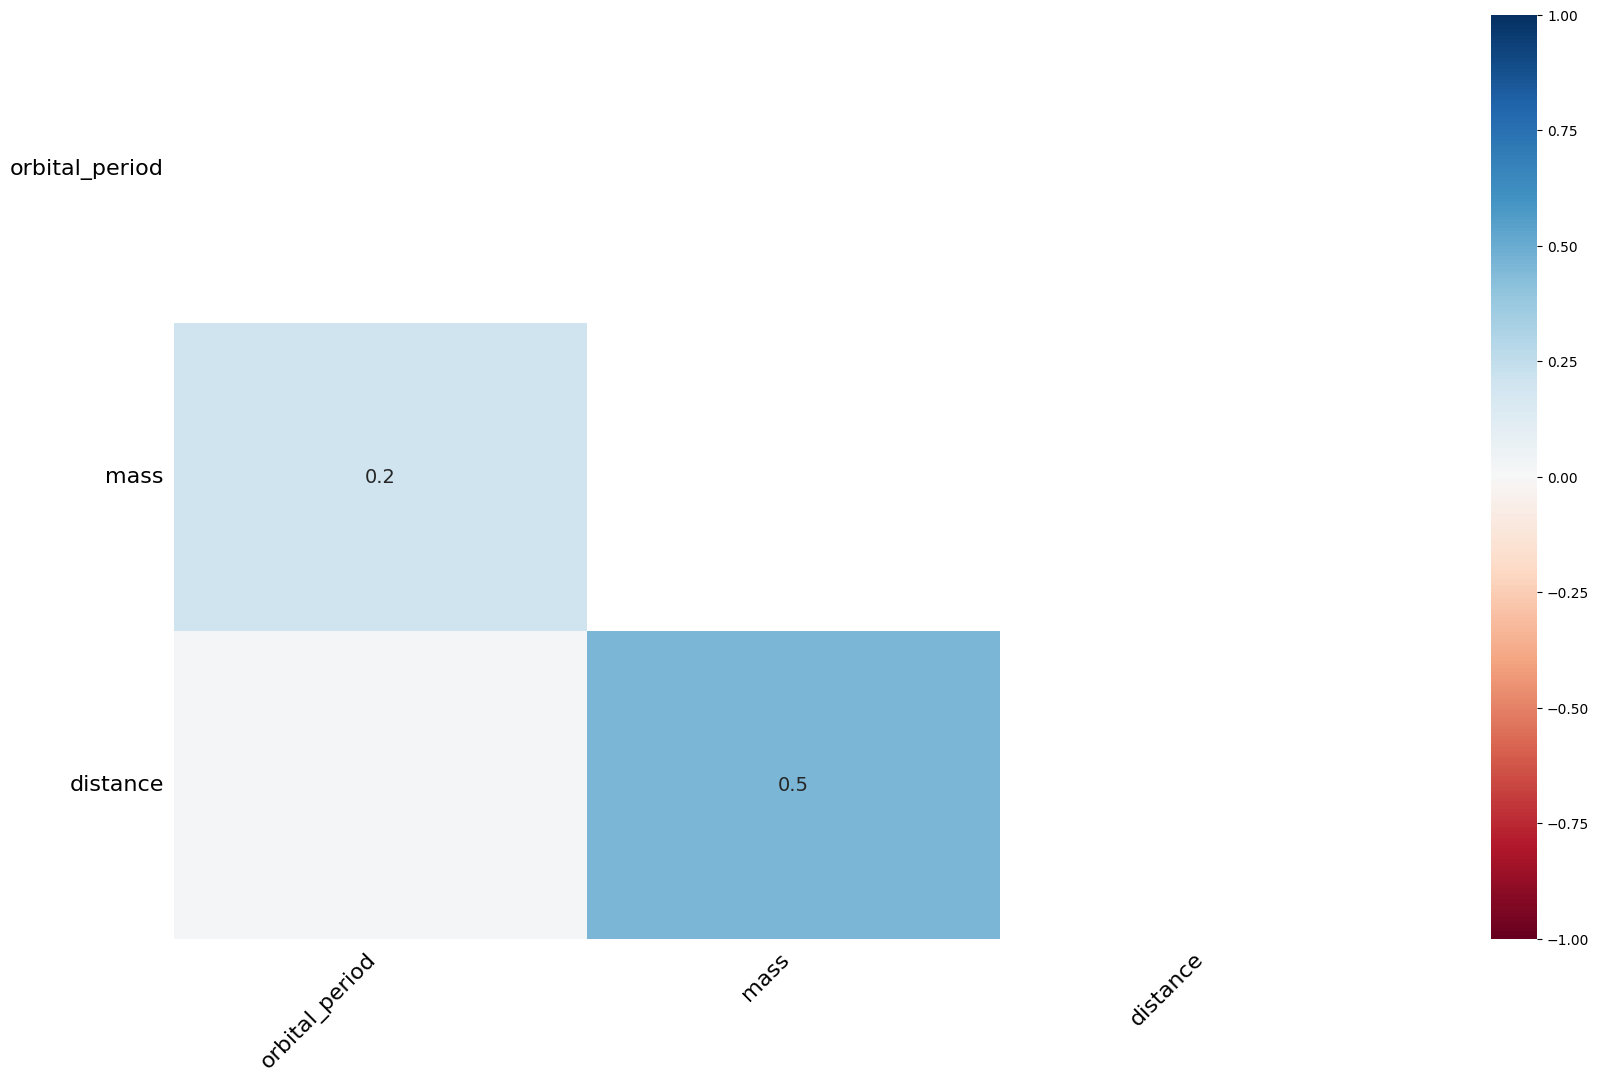

In [ ]:
msno.heatmap(df) ## distance mass 0.5. 1'e yaklaştıkça biri nullken diğeride null olması oranı artar. Yani bu grafik korelasyona bakar.

In [ ]:
df.dropna(how='all') ## hepsi eksik ise silinir